# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata.   


New task: to build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

# Build a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?
 
5.   Can the objective be modified to make it less problematic?
 


1. The task is to biuld machine learning model in order to predict if customer will give tips after the ride or not
2. Depending on prediction, driver can decide if he want to take such a passenger or not. It seems kind of strange and unfare, as if tips a mandatory they have to be included in the ride price and not ask from the passenger, especcially in case you do not want to give tips you can be rejected from the ride, which definetely not fare. So the task is really controversal.
 
- 2.1 If predicted that the passenger will not give tips and he will, the ompany and the driver will recieve a little extra money. But the driver can decide refuse to take such a passenger and company and driver won't receive much more money than the cmount of tips. Let's say 15$ against 2$. Plus the company will receive lot of negative feedback and complains regarding their service   
- 2.2 If model predicted that the passenger will give tips and he won't, the company and the driver will recieve a little bit less money ~2$ in total

3. To my mind this model not worth to be implemented as the potential problem will overweight potencial benefits, which is really not evident (benefits).    
4. Although to create required model won't be difficult I'd rather not and presenting potential problems to the stakeholders I will try to convince them to build some machine learning model, which will benefit all parties: the company, the drivers and the customers alike 
5. The dataset doesn't have any data about tips for cash transaction, and the card transaction incuded tips by default, so we can try to create model, which predicts type of payment (cash or card), but as we have 6 different payment type although with cash or card prevailed, it may be problematic. Although to my mind it worth a try.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


    1. We need strictly numeric features. Feature engineering will be helpful, for example distance trip and trip duration will be much of use.
    2. The target value should be calculated from "Tip_amount" and "Fare_amount" features (as we have identify 20% threshold)
    3. As the model will be classifier (>20% - "Yes" or "No"), so we need accuracy, precision, recall and f1 metrics. To visualize the model performance confusion matrix will be much of help.


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [123]:
# Import packages and libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
# Inspect the first few rows of df0
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Inspect the first few rows of `nyc_preds_means`.

In [5]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [4]:
# Merge datasets
df_combined = pd.concat([df0, nyc_preds_means], axis=1)
df_combined.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,59.633333,12.830000,45.374542
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,26.437500,4.022500,18.555128
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,7.873457,1.019259,7.151511
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,10.541111,1.580000,9.122755


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [5]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [144]:
# Subset the data to isolate only customers who paid by credit card
df1 = df_combined[df0["payment_type"] == 1]
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,18.016667,5.700000,19.426247
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,8.095370,1.062778,7.300146
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,59.560417,18.757500,52.000000
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,16.650000,2.077500,11.707049


##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous.

In [146]:
# Create tip % col
df1.loc[:, "tip_percent"] = (df1["tip_amount"] / (df1["total_amount"] - df1["tip_amount"])).round(3)

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [10]:
df1.loc[:,"generous"] = df1["tip_percent"].copy()
df1["generous"]

0        0.200
1        0.238
2        0.199
3        0.300
5        0.200
         ...  
22692    0.200
22693    0.200
22695    0.250
22697    0.150
22698    0.199
Name: generous, Length: 15265, dtype: float64

In [147]:
d = (df1["tip_percent"].round(3) >= 0.2).astype(int)
d.value_counts(normalize=True)

tip_percent
1    0.526368
0    0.473632
Name: proportion, dtype: float64

In [149]:
# Create 'generous' col (target)
df1.loc[:,"generous"] = df1["tip_percent"].copy()
df1.loc[:,"generous"] = df1["generous"].map(lambda x: 1 if x >= 0.2 else 0)

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [152]:
# Convert pickup and dropoff cols to datetime
df1.loc[:,"tpep_pickup_datetime"] = pd.to_datetime(df1["tpep_pickup_datetime"])
df1.loc[:,"tpep_dropoff_datetime"] = pd.to_datetime(df1["tpep_dropoff_datetime"])
df1.dtypes

C:\Users\alpilkin\AppData\Local\Temp\ipykernel_4916\291832726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["tpep_pickup_datetime"] = pd.to_datetime(df1["tpep_pickup_datetime"])
C:\Users\alpilkin\AppData\Local\Temp\ipykernel_4916\291832726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["tpep_dropoff_datetime"] = pd.to_datetime(df1["tpep_dropoff_datetime"])


Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
mean_duration                   float64
mean_distance                   float64
predicted_fare                  float64
tip_percent                     float64
generous                        float64
dtype: object

Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [154]:
# Create a 'day' col
df1.loc[:,"day"] = df1["tpep_pickup_datetime"].dt.day_name().map(lambda x: x.lower()).copy()

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [155]:
# Create 'am_rush' col
df1 = df1.copy()
df1.loc[:,"am_rush"] = np.where((df1["tpep_pickup_datetime"].dt.hour >= 6) & (df1["tpep_pickup_datetime"].dt.hour < 10), 1, 0)

# Create 'daytime' col
df1.loc[:,"daytime"] = np.where((df1["tpep_pickup_datetime"].dt.hour >= 10) & (df1["tpep_pickup_datetime"].dt.hour < 16), 1, 0)

# Create 'pm_rush' col
df1.loc[:,"pm_rush"] = np.where((df1["tpep_pickup_datetime"].dt.hour >= 16) & (df1["tpep_pickup_datetime"].dt.hour < 20), 1, 0)

# Create 'nighttime' col
df1.loc[:,"nighttime"] = np.where((df1["tpep_pickup_datetime"].dt.hour >= 20) | (df1["tpep_pickup_datetime"].dt.hour < 6), 1, 0)

In [156]:
df1.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245,0.200,1.0,saturday,1,0,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218,0.238,1.0,tuesday,0,1,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706,0.199,0.0,friday,1,0,0,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650,0.300,1.0,sunday,0,1,0,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351,0.200,1.0,saturday,0,0,0,1
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,12.830000,45.374542,0.200,1.0,wednesday,0,0,1,0
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58,26.437500,4.022500,18.555128,0.100,0.0,tuesday,0,0,1,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55,10.541111,1.580000,9.122755,0.199,0.0,friday,0,1,0,0
10,18017909,2,2017-03-04 11:58:00,2017-03-04 12:13:12,1,1.77,1,N,162,142,1,11.5,0.0,0.5,2.46,0.00,0.3,14.76,14.178333,1.641000,10.147760,0.200,1.0,saturday,0,1,0,0
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,40.500000,19.211667,52.000000,0.250,1.0,sunday,0,0,1,0


#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

In [210]:
# Create 'month' col
df1 = df1.copy()
df1["month"] = df1["tpep_pickup_datetime"].dt.month_name().str.lower().str[:3]

Examine the first five rows of your dataframe.

In [158]:
df1.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.434245,0.200,1.0,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.052218,0.238,1.0,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.053706,0.199,0.0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731650,0.300,1.0,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.441351,0.200,1.0,saturday,0,0,0,1,mar
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,12.830000,45.374542,0.200,1.0,wednesday,0,0,1,0,may
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.00,0.3,19.58,26.437500,4.022500,18.555128,0.100,0.0,tuesday,0,0,1,0,aug
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.00,0.3,16.55,10.541111,1.580000,9.122755,0.199,0.0,friday,0,1,0,0,nov
10,18017909,2,2017-03-04 11:58:00,2017-03-04 12:13:12,1,1.77,1,N,162,142,1,11.5,0.0,0.5,2.46,0.00,0.3,14.76,14.178333,1.641000,10.147760,0.200,1.0,saturday,0,1,0,0,mar
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,40.500000,19.211667,52.000000,0.250,1.0,sunday,0,0,1,0,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [77]:
df1.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_percent',
       'generous', 'day', 'am_rush', 'daytime', 'pm_rush', 'nighttime',
       'month'],
      dtype='object')

In [231]:
# Drop columns
columns_to_drop = ['Unnamed: 0', 'tpep_pickup_datetime','tpep_dropoff_datetime', 'trip_distance', 'store_and_fwd_flag',
 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tip_percent']

df2 = df1.drop(columns_to_drop, axis=1)

#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [212]:
df2.dtypes

VendorID             int64
passenger_count      int64
RatecodeID           int64
PULocationID         int64
DOLocationID         int64
mean_duration      float64
mean_distance      float64
predicted_fare     float64
generous           float64
day                 object
am_rush              int32
daytime              int32
pm_rush              int32
nighttime            int32
month               object
dtype: object

In [232]:
# 1. Define list of cols to convert to string
columns_to_str = ["DOLocationID", "PULocationID", "RatecodeID"]

# 2. Convert each column to string
df2 = df2.copy()
for column in columns_to_str:
    df2[column] = df2[column].astype("str")

df2.dtypes

VendorID             int64
passenger_count      int64
RatecodeID          object
PULocationID        object
DOLocationID        object
mean_duration      float64
mean_distance      float64
predicted_fare     float64
generous           float64
day                 object
am_rush              int32
daytime              int32
pm_rush              int32
nighttime            int32
month               object
dtype: object


<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [233]:
# Convert categoricals to binary
df2 = df2.copy()
df2 = pd.get_dummies(df2)
df2.dtypes

VendorID             int64
passenger_count      int64
mean_duration      float64
mean_distance      float64
predicted_fare     float64
                    ...   
month_mar             bool
month_may             bool
month_nov             bool
month_oct             bool
month_sep             bool
Length: 352, dtype: object

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [215]:
# Get class balance of 'generous' col
df2["generous"].value_counts(normalize=True)

generous
1.0    0.526368
0.0    0.473632
Name: proportion, dtype: float64

Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is imbalanced, but not extremely so.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

    F1 - harmonic metric, which combine precision and recall metrics

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [234]:
# Isolate target variable (y)
y = df2["generous"]

# Isolate the features (X)
X = df2.drop(["generous"], axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [217]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {"max_depth" : [2,5,10,50],
             "max_features" : [0.3, 0.5, 0.8],
             "n_estimators" : [50, 75, 100, 150]}
 
# 3. Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit="f1", n_jobs=-1)

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [166]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 50],
                         'max_features': [0.3, 0.5, 0.8],
                         'n_estimators': [50, 75, 100, 150]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [110]:
# Define a path to the folder where you want to save the model
path = 'd:/Python/Coursera_Data_Science_Google/'

In [111]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [112]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [225]:
model_name = "rf_scenario_1_ver2"
# write_pickle(path, rf1, model_name)
rf1 = read_pickle(path, model_name)

Examine the best average score across all the validation folds. 

In [226]:
# Examine best score
rf1.best_score_

0.7519605231425094

Examine the best combination of hyperparameters.

In [227]:
rf1.best_params_

{'max_depth': 5, 'max_features': 0.5, 'n_estimators': 100}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [118]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        })

    return table

Call `make_results()` on the GridSearch object.

In [228]:
make_results("Random Forest Tuned", rf1, "f1")

,model,precision,recall,F1,accuracy
0,Random Forest Tuned,0.696248,0.817494,0.751961,0.714217


A model with such low F1, precision, and recall scores is not good enough

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

In [235]:
rf_preds = rf1.best_estimator_.predict(X_test)

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

    We compare the result from two models based on differen algorythms and choose the model with the best result
    Objectively we will get model with the highest score    
    Although this score based on the test data and can be not accurate for prodaction data

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [121]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

##### RF test results

In [236]:
 # Get scores on test data
get_test_scores("Random Forest Tuned", rf_preds, y_test)

,model,precision,recall,F1,accuracy
0,Random Forest Tuned,0.673251,0.806266,0.733779,0.700295


**Question:** How do your test results compare to your validation results?

    The model preformance not very impressive in the first place (F1 score is just 0.751961)    
    For the test data f1 score is slightly worse: 0.733779, but in general on the same level    
    With this model we can achieche 73% effectivness

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [180]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {"max_depth" :[2,5,10,50],
             "min_child_weight" : [0.1, 0.3, 0.5],
             "learning_rate" : [0.01, 0.3, 0.5],
             "n_estimators" : [50, 75, 100]}

# 3. Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit="f1", n_jobs=-1)

Now fit the model to the `X_train` and `y_train` data.

In [181]:
%%time
xgb1.fit(X_train, y_train)

CPU times: total: 7.53 s
Wall time: 13min 38s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.3, 0.5],
                         'max_depth': [2, 5, 10, 50],
                         'min_child_weight': [0.1, 0.3, 0.5],
                         'n_estimators': [50, 75, 100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Get the best score from this model.

In [184]:
# Examine best score
xgb1.best_score_

0.7517045827637788

And the best parameters.

In [183]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.01,
 'max_depth': 2,
 'min_child_weight': 0.1,
 'n_estimators': 50}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [199]:
# Call 'make_results()' on the GridSearch object
make_results("XGBoost Tuned", xgb1, "f1")

,model,precision,recall,F1,accuracy
0,XGBoost Tuned,0.695578,0.817803,0.751705,0.713726


In [200]:
make_results("XGBoost Tuned", rf1, "f1")

,model,precision,recall,F1,accuracy
0,XGBoost Tuned,0.696248,0.817494,0.751961,0.714217


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

In [202]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

#### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [203]:
# Get scores on test data
get_test_scores("XGBoost tuned", xgb_preds, y_test)

,model,precision,recall,F1,accuracy
0,XGBoost tuned,0.673251,0.806266,0.733779,0.700295


In [204]:
get_test_scores("Random Forest", rf_preds, y_test)

,model,precision,recall,F1,accuracy
0,Random Forest,0.673251,0.806266,0.733779,0.700295


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

    For all scores Random forest performed slightly better  
    It can be as for XGBoost we use not very big amount of estimetors as it took long time to calculate
    Based on the results we will choose random forest model, although we can investigate further in order to improve its score

    On the second attempt - both model show the same result on the test data

Plot a confusion matrix of the model's predictions on the test data.

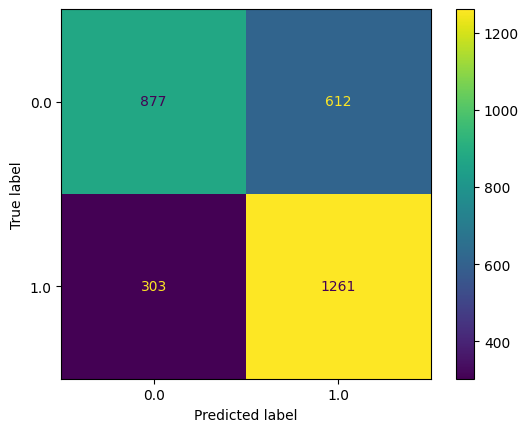

In [237]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.best_estimator_.classes_)
disp.plot()

**Question:** What type of errors are more common for your model?

    More common to predict that the customer will give generous tips but in fact he won't (612 cases)
    but the difference with opposite not so huge (303 cases)

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

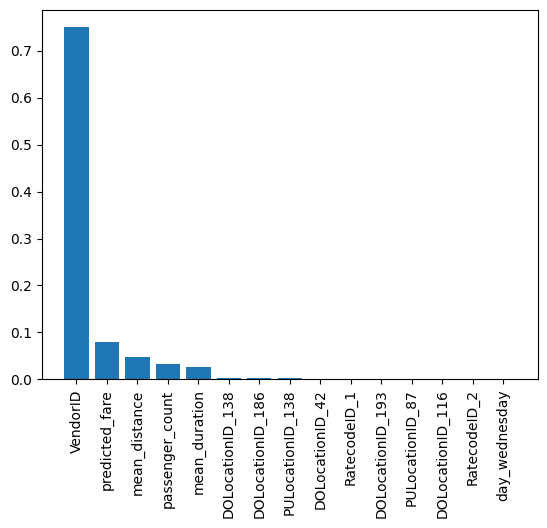

In [239]:
features = rf1.best_estimator_.feature_importances_
forest_importances = pd.Series(features, index=X.columns).sort_values(ascending=False)

plt.bar(x=forest_importances.index[:15], height=forest_importances[:15])
plt.xticks(rotation=90);


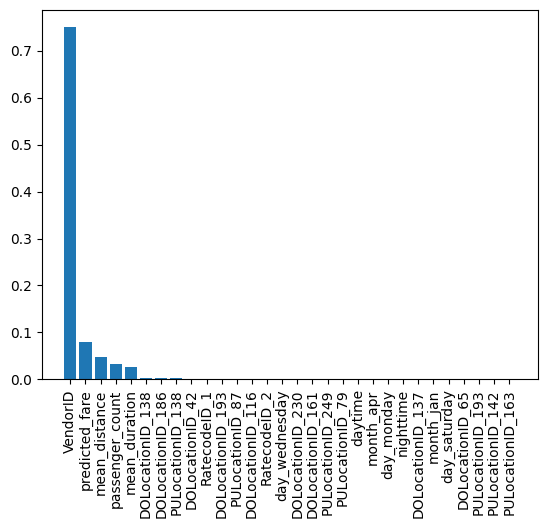

In [206]:
features = rf1.best_estimator_.feature_importances_
forest_importances = pd.Series(features, index=X.columns).sort_values(ascending=False)

plt.bar(x=forest_importances.index[:30], height=forest_importances[:30])
plt.xticks(rotation=90);

<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

    I would not recommend to use this model, as its score not really impressive.

2. **What was your model doing? Can you explain how it was making predictions?**   

    Based on the feature importance model splitted the data and continue spleting until it reaches its leaf with the final decision. Each decision can be investigate with plot_tree function. The most important feture is VendorID, following by predicted fare

3. **Are there new features that you can engineer that might improve model performance?**   

    We can investigate the weather condition, it can be useful here     
    As for engeneering additional feature, we can come up with smth new, although we pretty much all main features in the list at the moment

4. **What features would you want to have that would likely improve the performance of your model?**   

    Weather condition

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.